# C8M3 Notebook 1: Waffle Cahrts, Word Clouds and Regression Plots

In [1]:
#import  libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import matplotlib.patches as mpatches
from PIL import Image
import wordcloud

mpl.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/canada_csv.csv", index_col = 0)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
years = [str(i) for i in range(1980, 2014)]

## Waffle Charts
# Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

**Step 2.** The second step is defining the overall size of the `waffle` chart.

**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

**Step 5.** Map the `waffle` chart matrix into a visual.

**Step 6.** Prettify the chart.

**Step 7.** Create a legend and add it to chart.


In [4]:
# denmark, norway and sweden
df_dns = df.loc[["Denmark", "Norway", "Sweden"],:]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [5]:
#step 1
categorical_proportions = df_dns["Total"] / df_dns["Total"].sum()

pd.DataFrame({"Categorical Proportions": categorical_proportions})

,Categorical Proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [6]:
#step 2
width = 40
height = 10

total_num_of_tiles = width * height
print(f"total number of tiles are {total_num_of_tiles}")

total number of tiles are 400


In [7]:
#step 3
tiles_per_category = (categorical_proportions * total_num_of_tiles).round().astype(int)
pd.DataFrame({"Tiles per category": tiles_per_category})

,Tiles per category
Country,
Denmark,129
Norway,77
Sweden,194


In [8]:
sum(tiles_per_category[0:2])

206

In [9]:
#step 4
#initialize waffle_chart as empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)
#print(waffle_chart)

#define indices to loop threough waffle chart
categorical_index = 0
tile_index = 0

#populate waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1    # set equal to 1 on 1st iteration
        if tile_index >  sum(tiles_per_category[0:categorical_index]):     # values are  0, 129, 206, 400
            #proceed to the next category
            categorical_index += 1   
        waffle_chart[row, col] = categorical_index

In [10]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

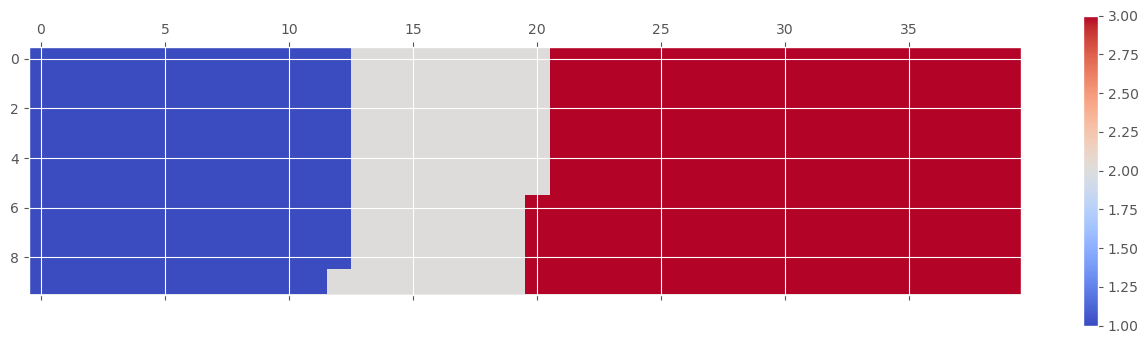

In [11]:
#step 5
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

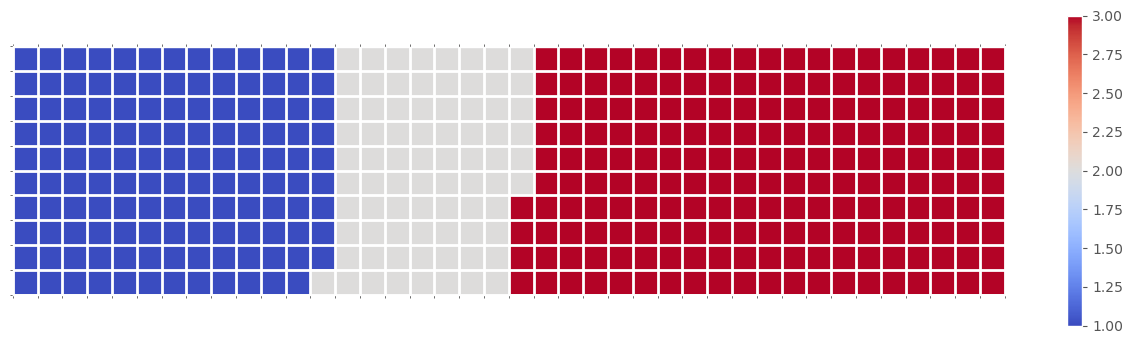

In [12]:
#step 6

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-0.5,  height, 1), minor = True)

#adding gridlines based on minor ticks
ax.grid(which = "minor", color= "w", linestyle="-", linewidth= 2)

plt.xticks([])
plt.yticks([])
plt.show()

C:\Users\hrushisanap\AppData\Local\Temp\ipykernel_20896\3087083399.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
C:\Users\hrushisanap\AppData\Local\Temp\ipykernel_20896\3087083399.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
C:\Users\hrushisanap\AppData\Local\Temp\ipykernel_20896\3087083399.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

<Figure size 640x480 with 0 Axes>

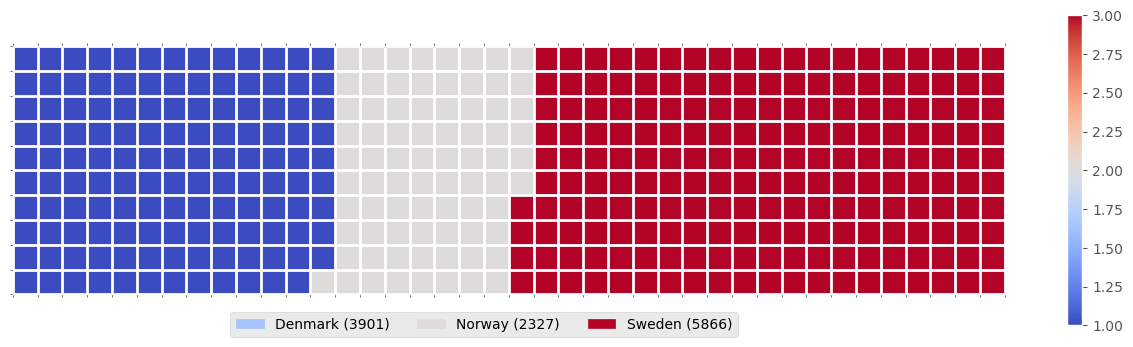

In [13]:
# step 7
#step 6

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-0.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-0.5,  height, 1), minor = True)

#adding gridlines based on minor ticks
ax.grid(which = "minor", color= "w", linestyle="-", linewidth= 2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

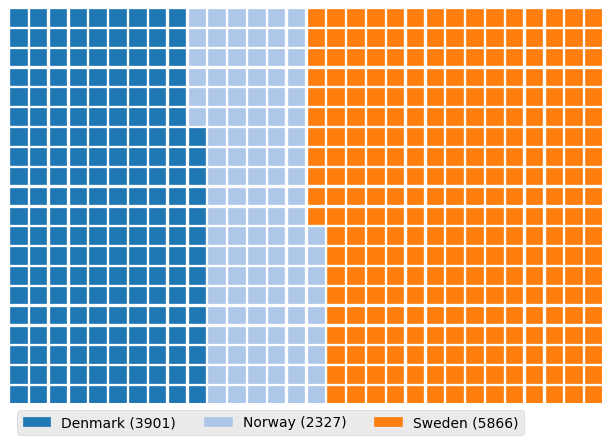

In [14]:
# easy and viable way
#from pywaffle import Waffle

fig = plt.figure(FigureClass = Waffle,
                 rows  = 20,
                 columns = 30,
                 values = df_dns["Total"],
                 cmap_name = "tab20", #colorscheme
                 legend = {"labels":[f"{k} ({v})" for k, v in zip(df_dns.index.values, df_dns.Total)],
                           "loc": "lower left",
                           "bbox_to_anchor":(0, -0.1),
                           "ncol":3}
                )

plt.show()         

In [15]:
df_indochina = df.loc[["India", "China"], ["Total"]]
df_indochina

,Total
Country,
India,691904
China,659962


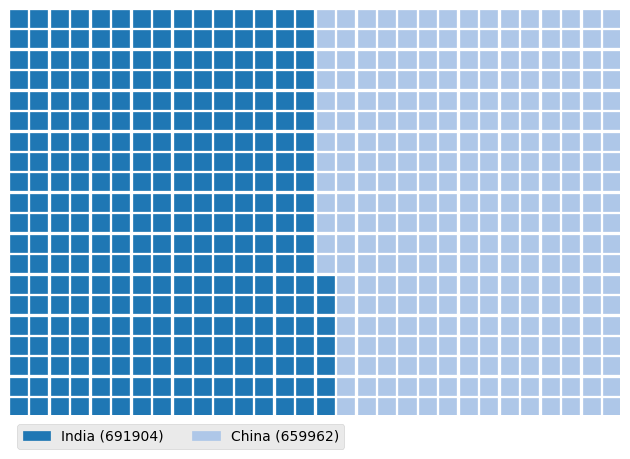

In [16]:
fig = plt.figure(FigureClass = Waffle,
                 rows  = 20,
                 columns = 30,
                 values = df_indochina["Total"],
                 cmap_name = "tab20", #colorscheme
                 legend = {"labels":[f"{k} ({v})" for k, v in zip(df_indochina.index.values, df_indochina.Total)],
                           "loc": "lower left",
                           "bbox_to_anchor":(0, -0.1),
                           "ncol":2}
                )

plt.show()

---
## Word Clouds

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


In [17]:
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS

In [18]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.


In [19]:
stop_words = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [20]:
alice_wc = WordCloud(stopwords = stop_words, background_color="white")
alice_wc.generate(alice_novel)

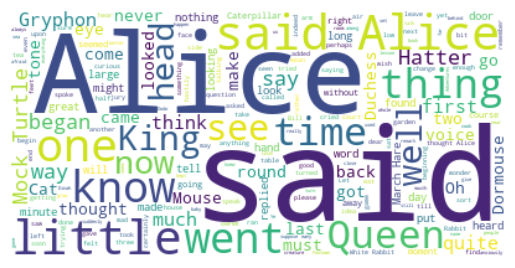

In [21]:
# visaulalizing word cloud
plt.imshow(alice_wc, interpolation  = "bilinear")
plt.axis("off")
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


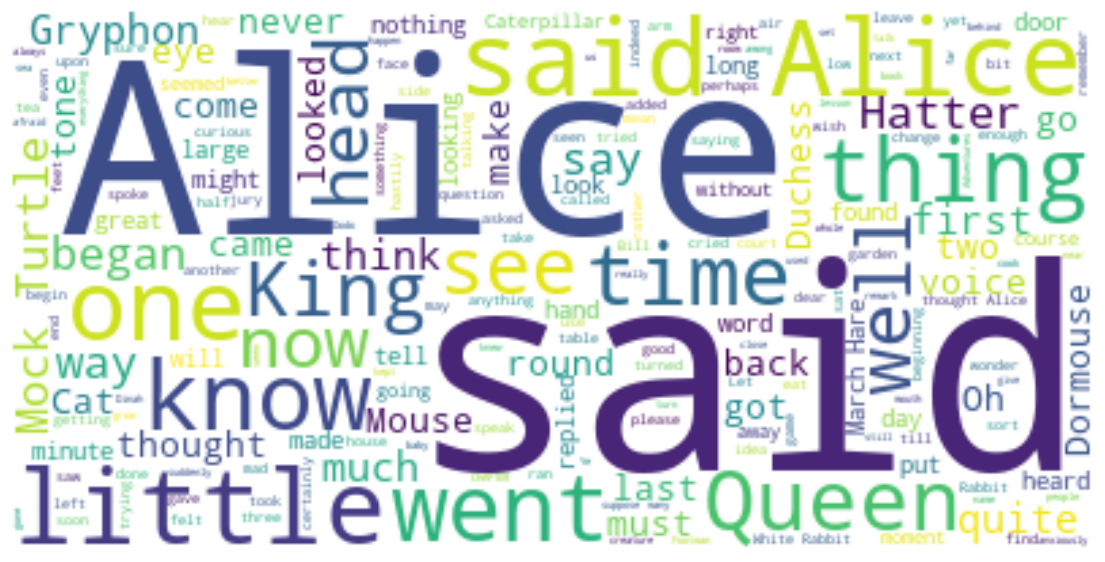

In [22]:
fig = plt.figure(figsize = (14, 18))

plt.imshow(alice_wc, interpolation  = "bilinear")
plt.axis("off")
plt.show()

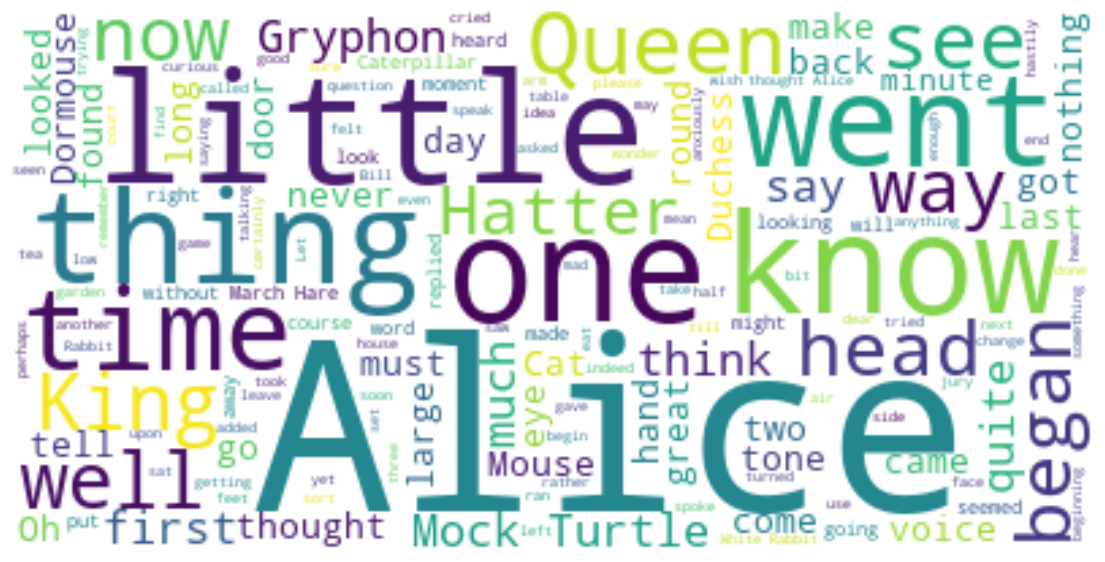

In [23]:
#adding "said" to stopwords as it is not informative
stop_words.add("said")

alice_wc.generate(alice_novel)
fig = plt.figure(figsize = (14, 18))

plt.imshow(alice_wc, interpolation  = "bilinear")
plt.axis("off")
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it *alice_mask.png*.


In [24]:
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

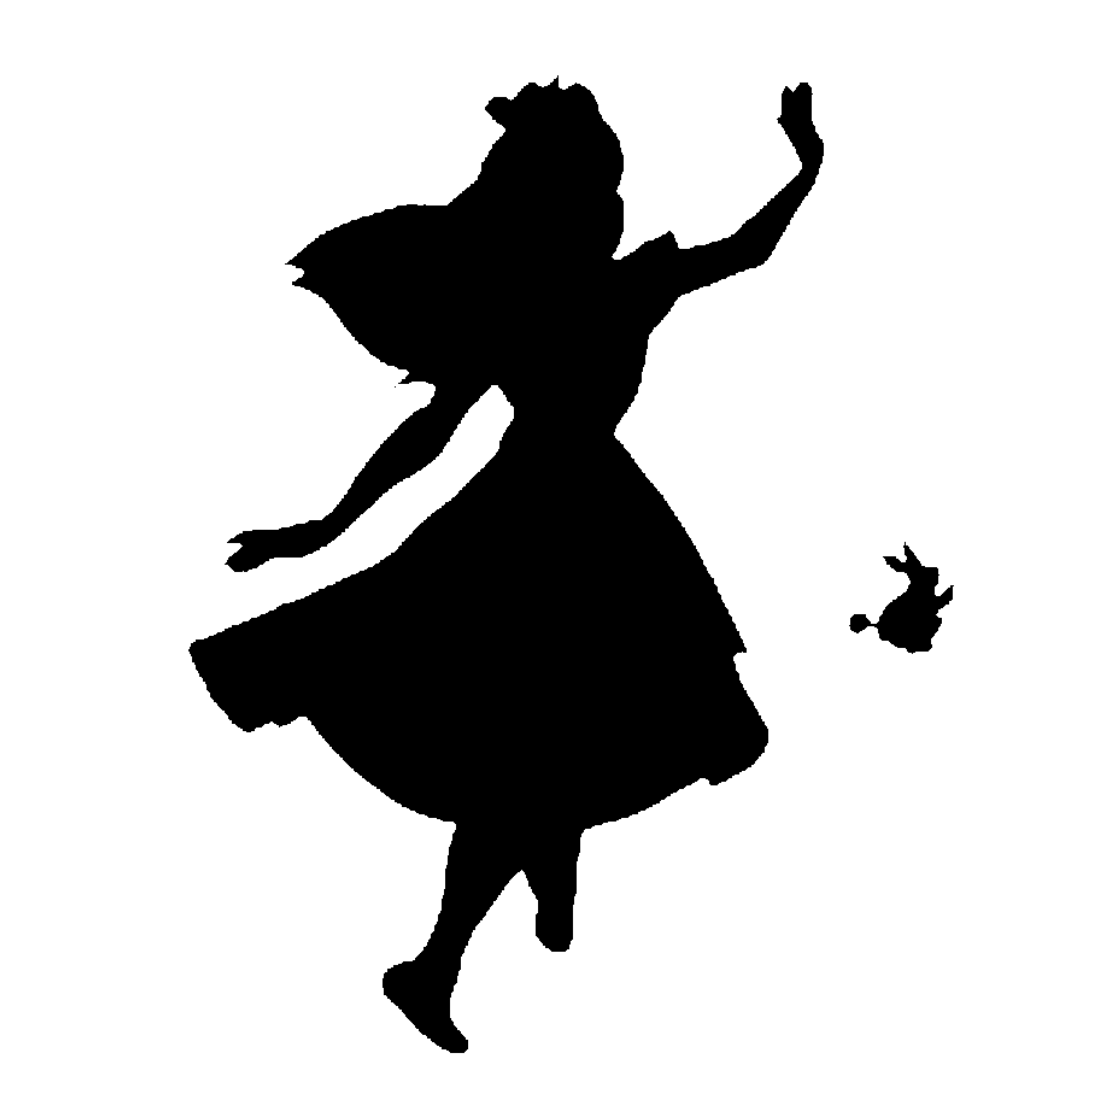

In [25]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

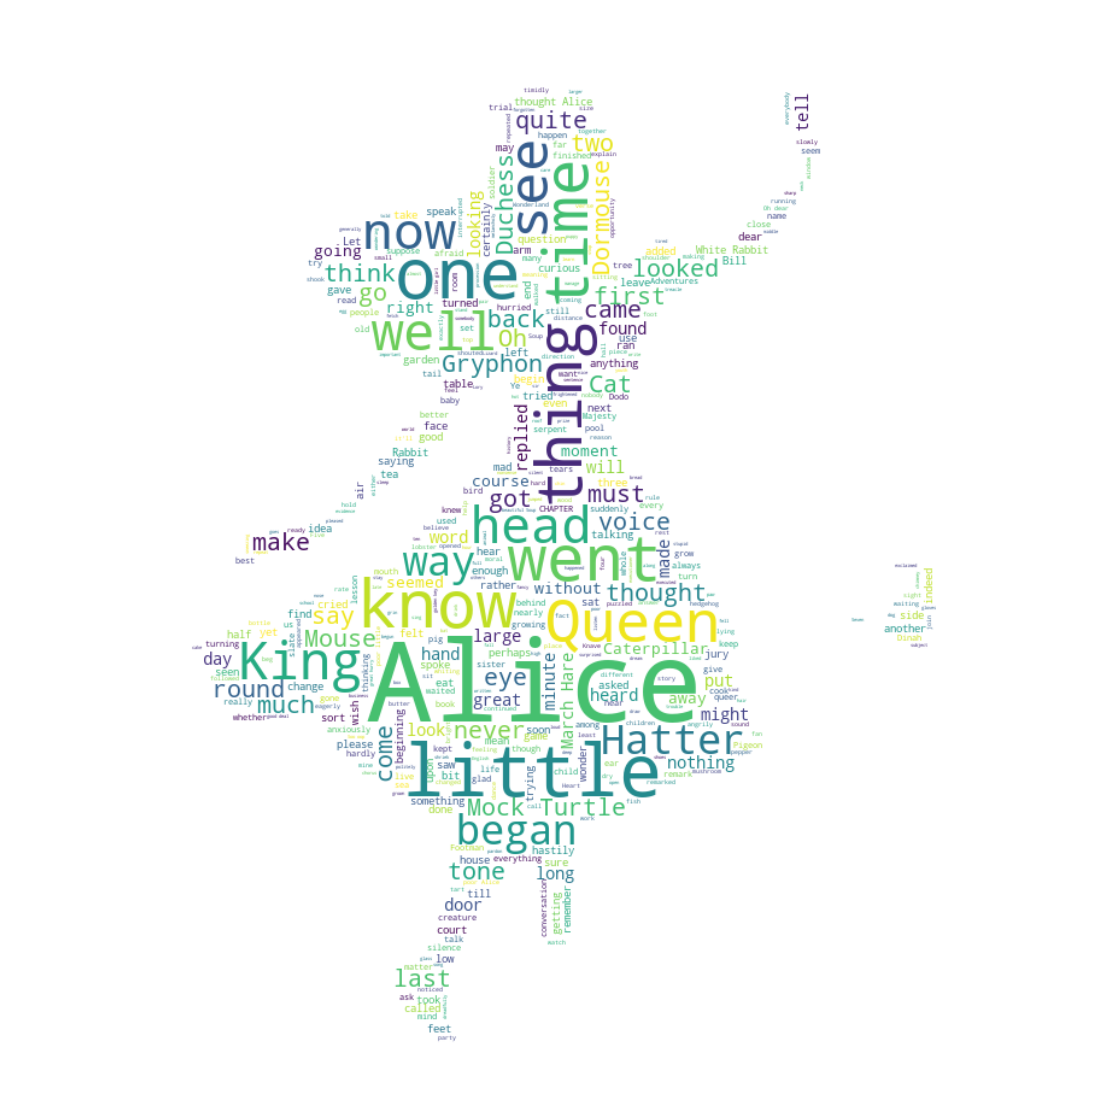

In [26]:
#initiating thew wordcloud object
alice_wc = WordCloud(background_color= "white", max_words=2000, mask=alice_mask, stopwords=stop_words)

alice_wc.generate(alice_novel)
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

---
## Plotting with Seaborn

In [27]:
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

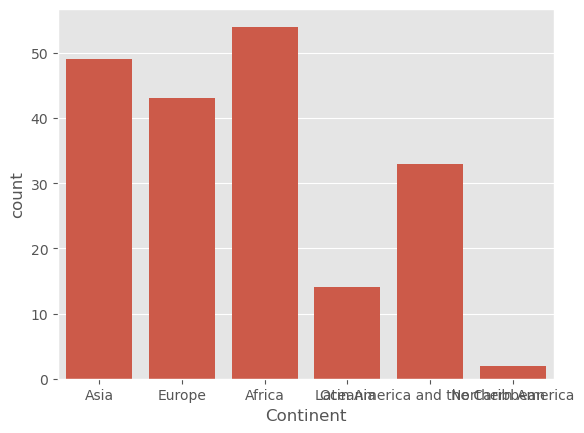

In [28]:
# countplot
sns.countplot(x = "Continent", data = df)

<Axes: xlabel='Continent', ylabel='count'>

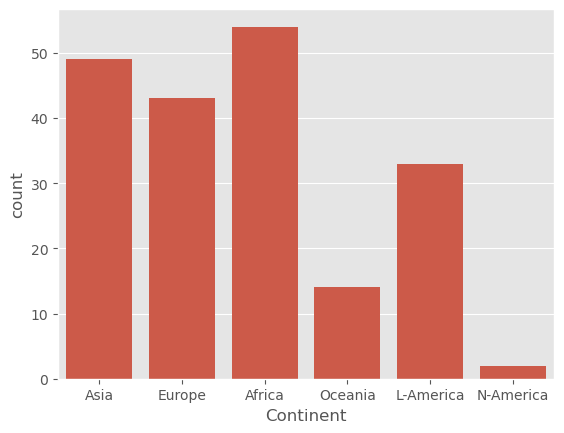

In [30]:
df1  =df.replace("Latin America and the Caribbean", "L-America")
df1 = df1.replace('Northern America', 'N-America')
sns.countplot(x = "Continent", data =  df1)

<Axes: xlabel='Continent', ylabel='Total'>

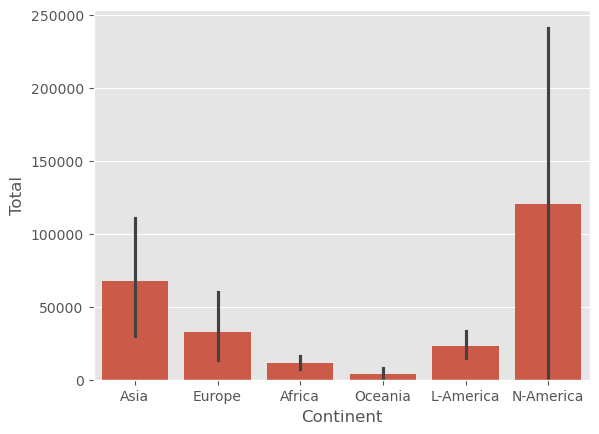

In [31]:
#barplot
sns.barplot(x = "Continent", y = "Total", data = df1)

In [33]:
df2 = df1.groupby("Continent")["Total"].sum()
df2

Continent
Africa        618948
Asia         3317794
Europe       1410947
L-America     765148
N-America     241142
Oceania        55174
Name: Total, dtype: int64

In [35]:
df_total = pd.DataFrame(df[years].sum(axis = 0))
df_total.index  = map(float, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ["year", "total"]
df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

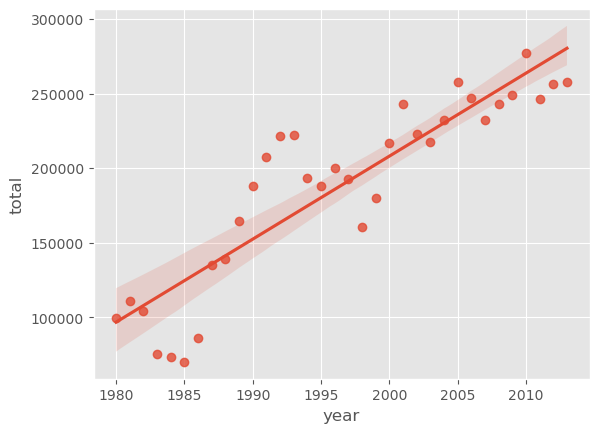

In [36]:
sns.regplot(x = "year", y = "total", data = df_total)

<Axes: xlabel='year', ylabel='total'>

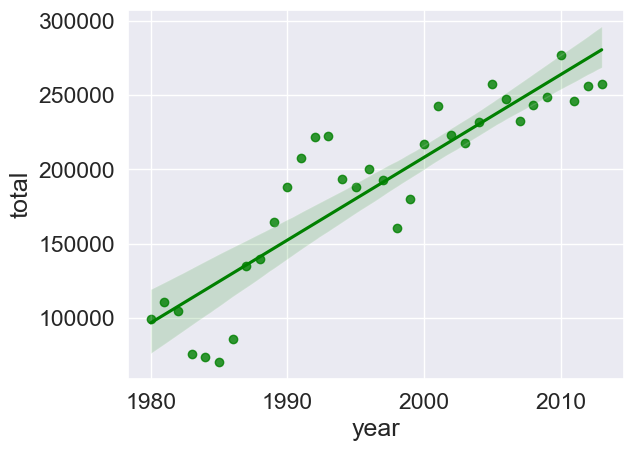

In [44]:
# change color
sns.regplot(x = "year", y = "total", data = df_total, color = "green")

<Axes: xlabel='year', ylabel='total'>

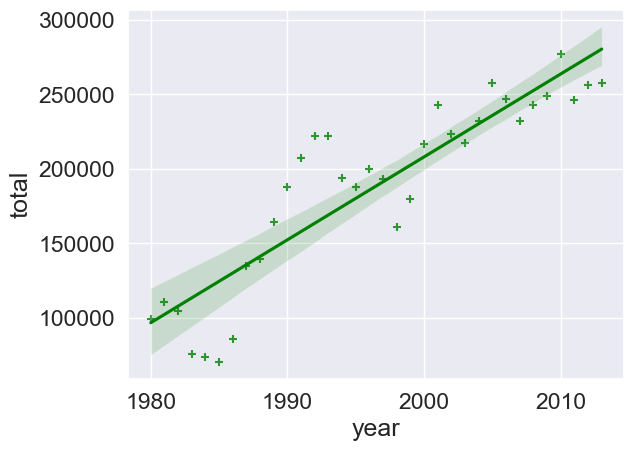

In [45]:
# change marker
sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+")

<Axes: xlabel='year', ylabel='total'>

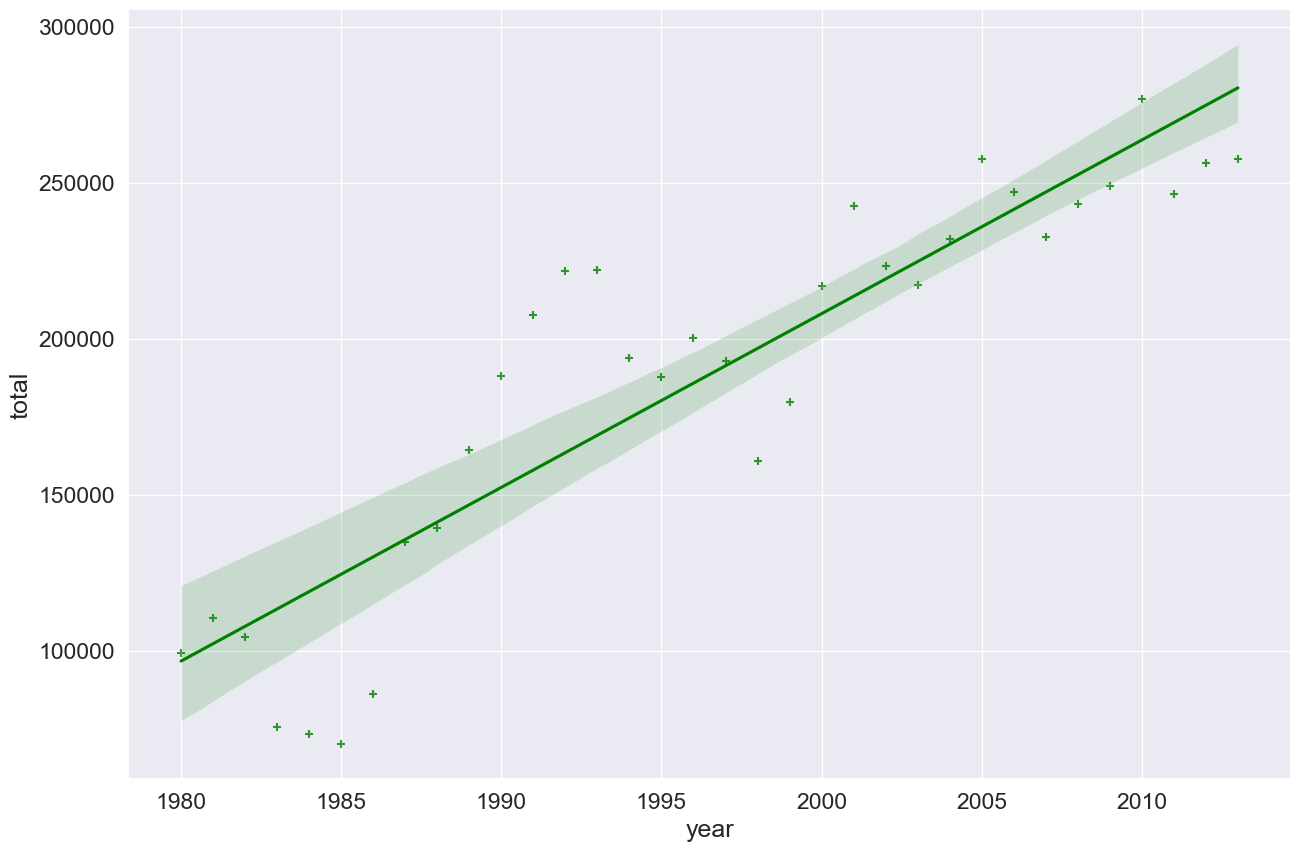

In [46]:
#increase plot size
plt.figure(figsize = (15, 10))
sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+")

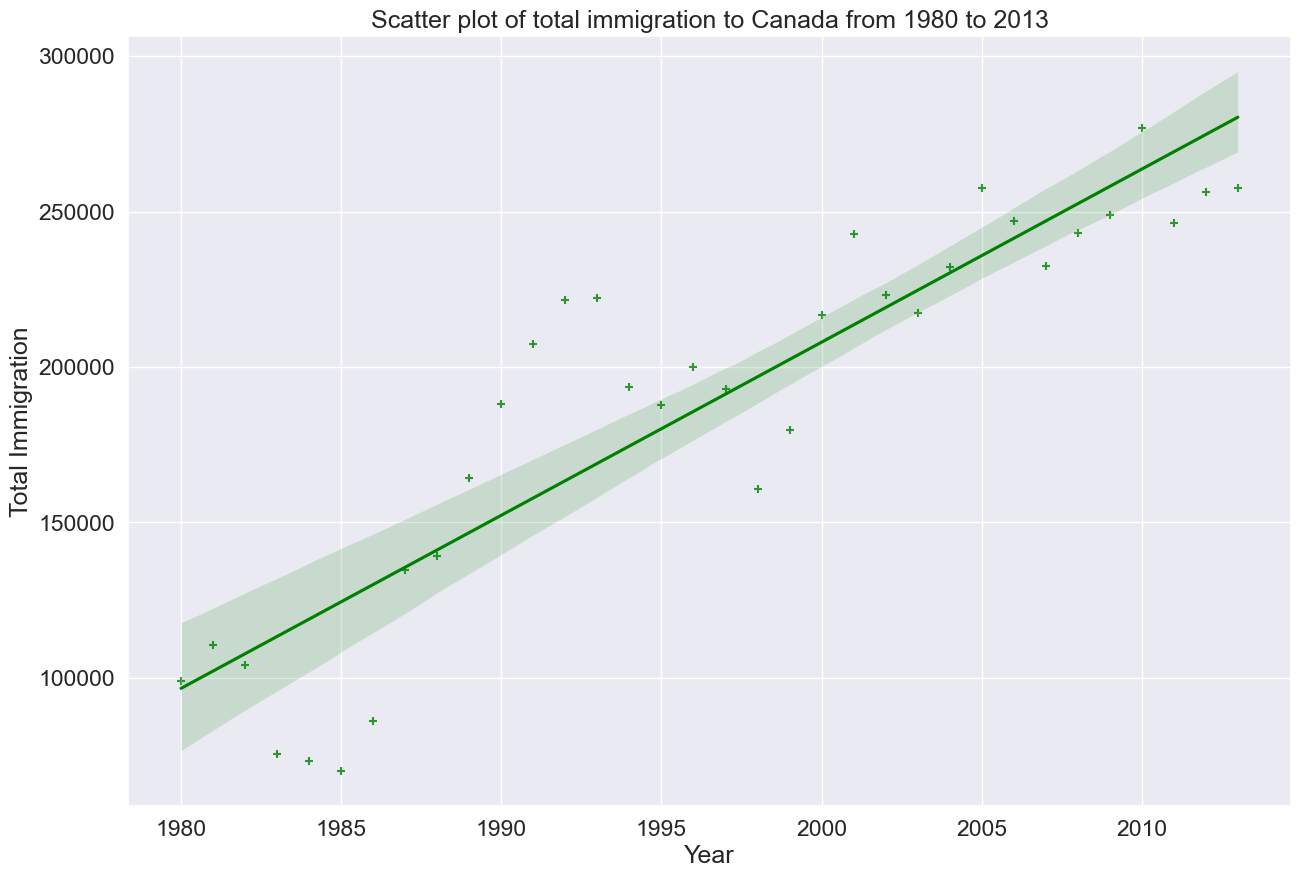

In [48]:
#increrase font size
plt.figure(figsize = (15, 10))
ax = sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+")

ax.set(xlabel = "Year", ylabel = "Total Immigration")
ax.set_title("Scatter plot of total immigration to Canada from 1980 to 2013")
plt.show()

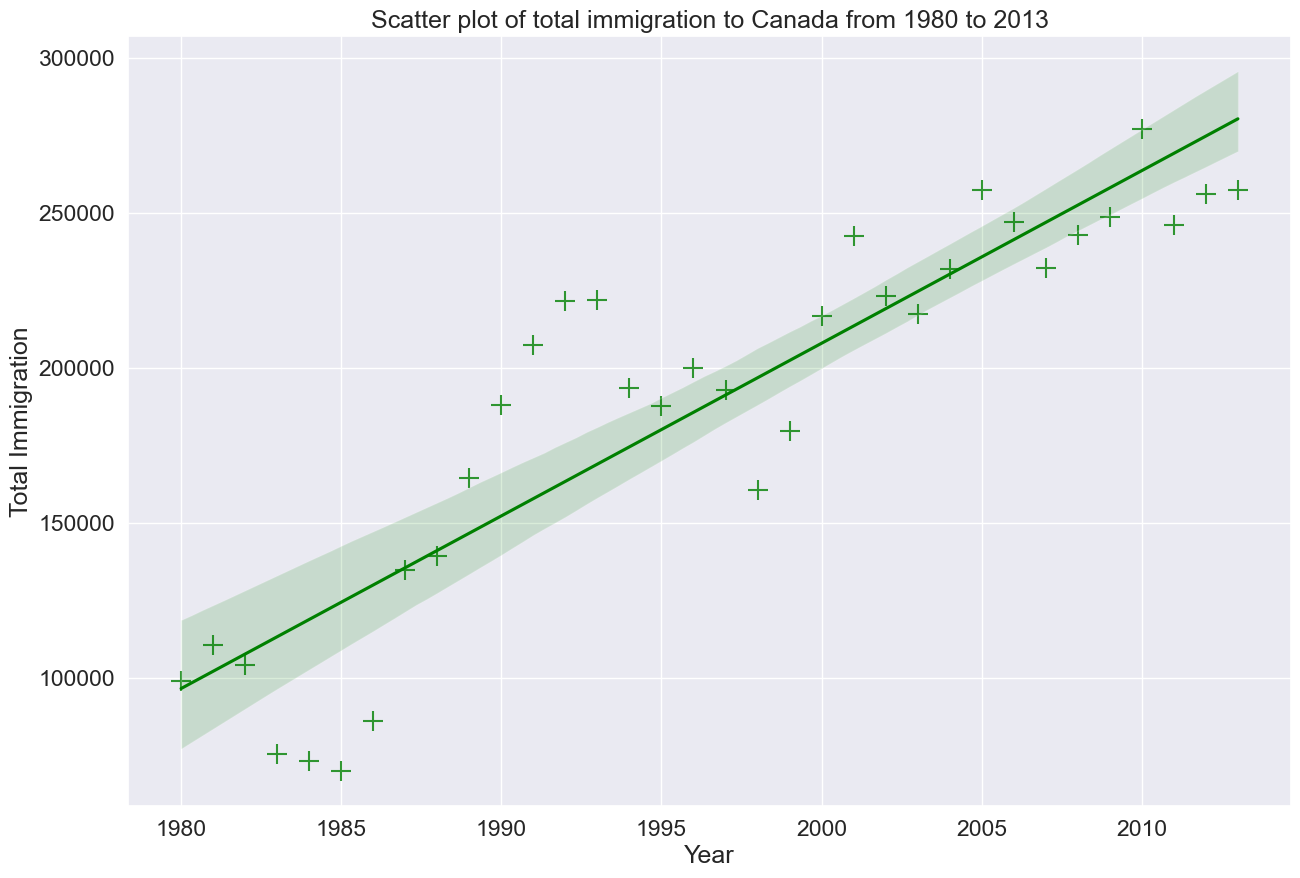

In [49]:
#increase market size
plt.figure(figsize = (15, 10))
sns.set(font_scale=1.5)

ax = sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+", scatter_kws = {"s":200})

ax.set(xlabel = "Year", ylabel = "Total Immigration")
ax.set_title("Scatter plot of total immigration to Canada from 1980 to 2013")
plt.show()

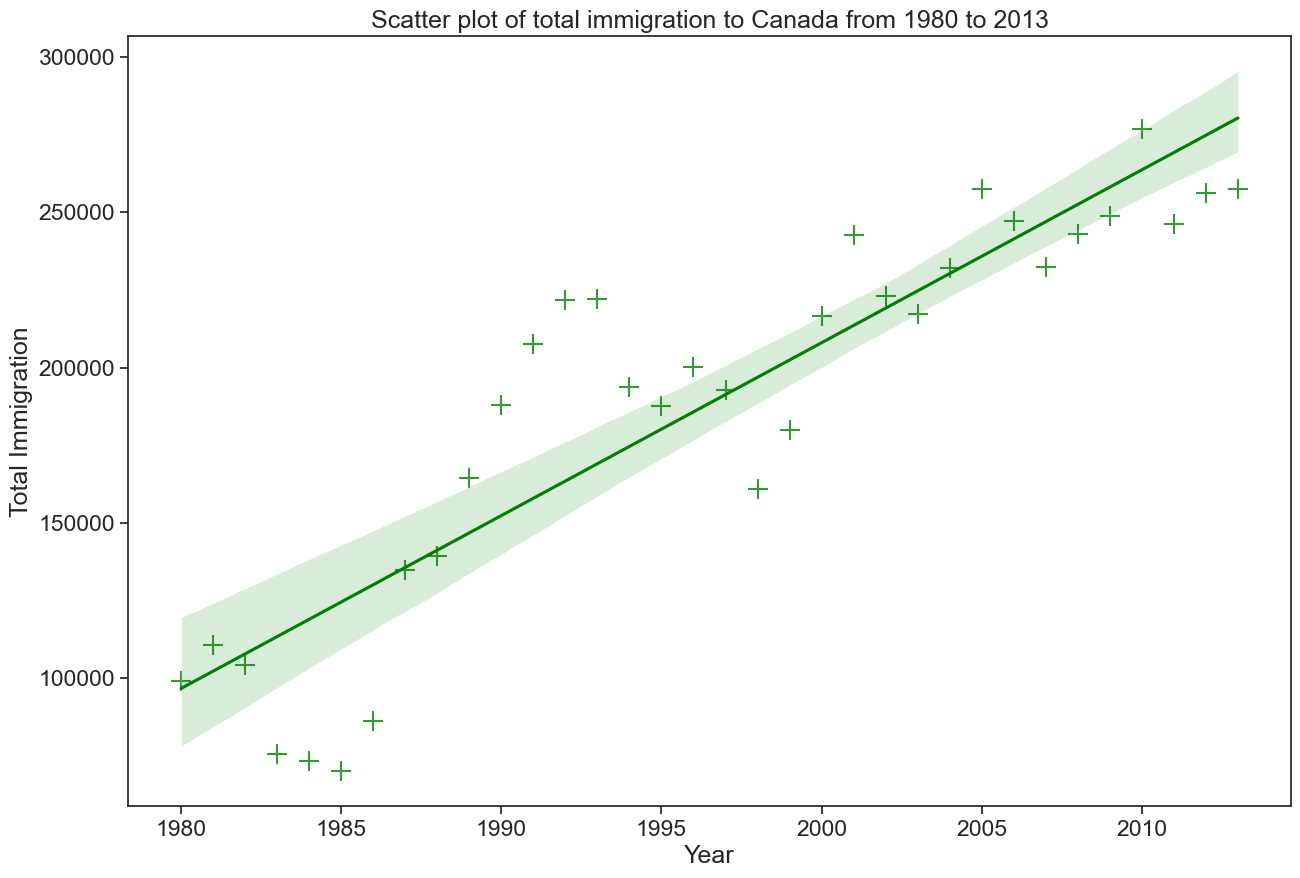

In [53]:
# change background color to white
plt.figure(figsize = (15, 10))
sns.set(font_scale=1.5)
sns.set_style("ticks")  # change background to white background

ax = sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+", scatter_kws = {"s":200})

ax.set(xlabel = "Year", ylabel = "Total Immigration")
ax.set_title("Scatter plot of total immigration to Canada from 1980 to 2013")
plt.show()

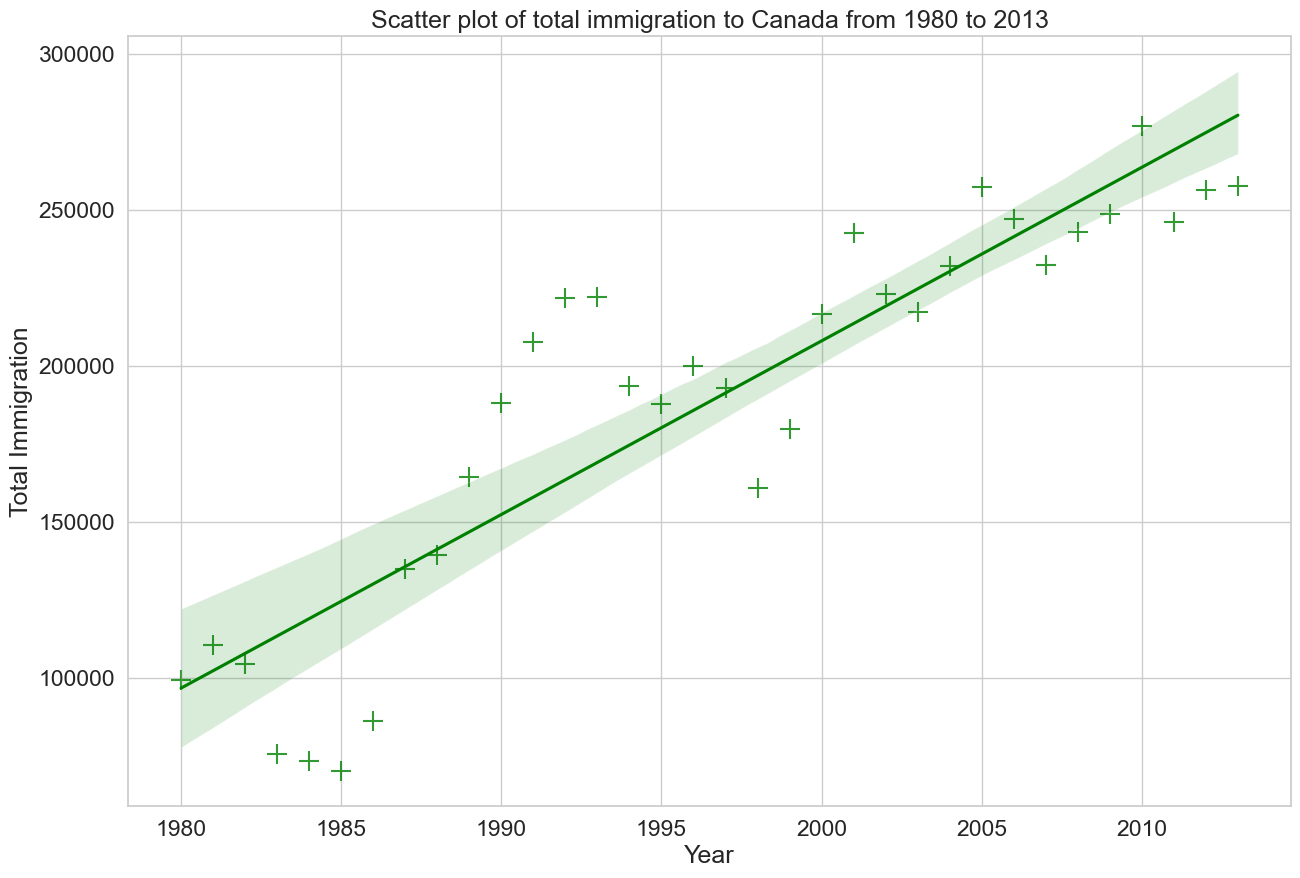

In [54]:
# change background color to white with grid
plt.figure(figsize = (15, 10))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")  # change background to white background wth grid

ax = sns.regplot(x = "year", y = "total", data = df_total, color = "green", marker = "+", scatter_kws = {"s":200})

ax.set(xlabel = "Year", ylabel = "Total Immigration")
ax.set_title("Scatter plot of total immigration to Canada from 1980 to 2013")
plt.show()

---
Thank You!!!